# Mejorar un modelo de machine learning

In [1]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score # clasificación
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error # regresión

In [2]:
workflow = [
    "1. Obtener y preparar los datos",
    "2. Dividir los datos",
    "3. Elegir el mejor modelo/estimador/algoritmo para nuestro problema y sus hiperparámetros**",
    "4. Ajustar el modelo/algoritmo a los datos de entrenamiento",
    "5. Hacer predicciones",
    "6. Evaluar el modelo",
    "7. Mejorar el modelo",
    "8. Guardar y cargar el modelo"
]

### Problema de Regresión 

In [3]:
# Regression data
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing() # cargar como diccionario

# Convertir el diccionario en DataFrame
housing_df = pd.DataFrame(housing["data"], columns=housing["feature_names"])

# Obtener la variable objetivo
housing_df["target"] = pd.Series(housing["target"])

housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [4]:
np.random.seed(42)

# Crear los datos
X = housing_df.drop("target", axis=1)
y = housing_df["target"]

# Dividir los datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Crear la instancia del modelo
model = RandomForestRegressor()

# Ajustar modelo
model.fit(X_train, y_train)

# Hacer predicciones
y_preds = model.predict(X_test)

# Evaluar el model
print("Regression metrics on the test set")
print(f"R2 score: {r2_score(y_test, y_preds)}")
print(f"MAE: {mean_absolute_error(y_test, y_preds)}")
print(f"MSE: {mean_squared_error(y_test, y_preds)}")

Regression metrics on the test set
R2 score: 0.8059809073051385
MAE: 0.3270458119670544
MSE: 0.2542443610174998


### Problema de Clasificación

In [5]:
# Importar los datos
heart_disease = pd.read_csv("../../data/raw/heart-disease.csv")
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [6]:
# Configurar semilla aleatoria
np.random.seed(42)

# Dividir los datos en X & y
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# Dividir los datos en train y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Crear modelo
clf = RandomForestClassifier()

# Entrenar modelo
clf.fit(X_train, y_train)

# Hacer predicciones
y_preds = clf.predict(X_test)

# Evaluar el model
print("Classifier metrics on the test set")
print(f"Accurracy: {accuracy_score(y_test, y_preds)*100:.2f}%")
print(f"Precision: {precision_score(y_test, y_preds)}")
print(f"Recall: {recall_score(y_test, y_preds)}")
print(f"F1: {f1_score(y_test, y_preds)}")

Classifier metrics on the test set
Accurracy: 85.25%
Precision: 0.8484848484848485
Recall: 0.875
F1: 0.8615384615384616


In [7]:
clf = RandomForestClassifier(n_estimators=100)

In [8]:
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

# Mejorando el modelo

* Primeras predicciones = predicciones base.
* Primer modelo = modelo base.

Desde una perspectiva de **datos:**

* ¿Podríamos recopilar más datos? (en general, cuantos más datos, mejor)
* ¿Podríamos mejorar nuestros datos?

Desde una perspectiva del **modelo:**

* ¿Hay un mejor modelo que podríamos usar?
* ¿Podríamos mejorar el modelo actual?

**Hiperparámetros vs. Parámetros**

* Parámetros = el modelo encuentra estos patrones en los datos
* Hiperparámetros = configuraciones en un modelo que puedes ajustar para (potencialmente) mejorar su capacidad de encontrar patrones

Tres formas de **ajustar hiperparámetros:**
* A mano
* Aleatoriamente con RandomSearchCV
* Exhaustivamente con GridSearchCV

## 1. Ajustar hiperparámetros a mano
*(Tuning hyperparameters by hand)*

Hagamos 3 conjuntos: entrenamiento, validación y prueba.

In [9]:
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

Vamos a intentar ajustar:

* `max_depth`
* `max_features`
* `min_samples_leaf`
* `min_samples_spit`
* `n_estimators`

In [10]:
# Función de evaluación que utiliza todas las principales funciones de métricas de clasificación de Scikit-Learn
def evaluate_preds(y_true, y_preds):
    """
    Realiza una comparación de evaluación entre las etiquetas y_true
    y las etiquetas y_pred en una clasificación.
    """
    accuracy = accuracy_score(y_true, y_preds)
    precision = precision_score(y_true, y_preds)
    recall = recall_score(y_true, y_preds)
    f1 = f1_score(y_true, y_preds)
    metric_dict = {"accuracy": round(accuracy, 2),
                   "precision": round(precision, 2),
                   "recall": round(recall, 2),
                   "f1": round(f1, 2)}
    print(f"Acc: {accuracy * 100:.2f}%")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 score: {f1:.2f}")
    
    return metric_dict

In [11]:
np.random.seed(42)

# Barajar los datos
heart_disease_shuffled = heart_disease.sample(frac=1)

# Dividir en X & y
X = heart_disease_shuffled.drop("target", axis=1)
y = heart_disease_shuffled["target"]

# Dividir en conjuntos de entrenamiento, validación y prueba
train_split = round(0.7 * len(heart_disease_shuffled)) # 70% de los datos
valid_split = round(train_split + 0.15 * len(heart_disease_shuffled)) # 15% de los datos
X_train, y_train = X[:train_split], y[:train_split]
X_valid, y_valid = X[train_split:valid_split], y[train_split:valid_split]
X_test, y_test = X[valid_split:], y[valid_split:]

clf = RandomForestClassifier()
clf.fit(X_train, y_train)

# Hacer predicciones base o de referencia (baseline predictions)
y_preds = clf.predict(X_valid)

# Evaluar el clasificador en el conjunto de validación
baseline_metrics = evaluate_preds(y_valid, y_preds)

Acc: 82.22%
Precision: 0.81
Recall: 0.88
F1 score: 0.85


In [12]:
len(X_train), len(X_valid), len(X_test)

(212, 45, 46)

Barajar los datos antes de dividirlos es una buena práctica porque:

- **Evita Sesgos en el Orden de los Datos:** En muchos casos, los datos pueden estar ordenados de una manera específica (por ejemplo, cronológicamente o agrupados por categorías). Si no se barajan, es posible que el modelo entrene sobre datos no representativos del problema general.

- **Aumenta la Generalización:** Al barajar los datos, cada conjunto (entrenamiento, validación y prueba) tendrá una mezcla más representativa de todo el conjunto de datos, lo que mejora la capacidad del modelo para generalizar a datos no vistos.

- **Previene Correlaciones Indeseadas:** Si los datos tienen algún patrón inherente debido a su orden (por ejemplo, todas las etiquetas "positivas" están juntas), el modelo podría aprender patrones incorrectos que no reflejan la verdadera relación en los datos.

- **Facilita la Validación Cruzada:** Barajar los datos antes de dividirlos es especialmente útil cuando se utiliza validación cruzada, ya que garantiza que las divisiones sean aleatorias y representativas.

Barajar los datos introduce aleatoriedad, **reduciendo la posibilidad de que el modelo esté sesgado** hacia un subconjunto de datos o aprenda patrones irrelevantes debido al orden de los datos.

### Cuándo Elegir Cada Método de División

**Usar División Manual:**
- Necesitas un conjunto de **validación independiente.**
- Trabajas con **series temporales** u otro tipo de datos secuenciales.
- Quieres tener un control completo sobre la división (por ejemplo, requisitos específicos de proporciones).

**Usar `train_test_split`:**
- Solo necesitas dividir en **entrenamiento y prueba.**
- No tienes necesidades específicas de orden o secuencia en los datos.
- Quieres rapidez y simplicidad en la división de datos.

In [13]:
np.random.seed(42)

# Crear un segundo clasificador con diferentes hiperparámetros
clf_2 = RandomForestClassifier(n_estimators=100)
clf_2.fit(X_train, y_train)

# Hacer predicciones con diferentes hiperparámetros
y_preds_2 = clf_2.predict(X_valid)

# Evaluar el 2º clasificador
clf_2_metrics = evaluate_preds(y_valid, y_preds_2)

Acc: 80.00%
Precision: 0.83
Recall: 0.80
F1 score: 0.82


## 2. Ajustar hiperparámetros con `RandomizedSearchCV`
*(Tuning hyperparameters with `RandomizedSearchCV`)*

🔗 [RandomizedSearchCV - Docs Scikit-Learn](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html)

Explora un **conjunto aleatorio de combinaciones de hiperparámetros** dentro de un rango predefinido.

**Ventajas:**
- Más eficiente para espacios de búsqueda grandes, ya que no prueba todas las combinaciones.
- Útil para encontrar buenas combinaciones rápidamente.

**Desventajas:**
- No garantiza encontrar la mejor combinación, ya que depende del número de iteraciones.

In [14]:
from sklearn.model_selection import RandomizedSearchCV

grid = {"n_estimators": [10, 100, 200, 500, 1000, 1200],
        "max_depth": [None, 5, 10, 20, 30],
        "max_features": ["sqrt", "log2"],
        "min_samples_split": [2, 4, 6],
        "min_samples_leaf": [1, 2, 4]}

np.random.seed(42)

# Divide en X & y
X = heart_disease_shuffled.drop("target", axis=1)
y = heart_disease_shuffled["target"]

# Divide en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instancia RandomForestClassifier
clf = RandomForestClassifier(n_jobs=1)

# Configura RandomizedSearchCV
rs_clf = RandomizedSearchCV(estimator=clf,
                            param_distributions=grid, 
                            n_iter=10, # number of models to try
                            cv=5,
                            verbose=2)

# Ajusta la versión de RandomizedSearchCV de clf
rs_clf.fit(X_train, y_train);

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   0.5s
[CV] END max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   0.5s
[CV] END max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   0.5s
[CV] END max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   0.5s
[CV] END max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   0.5s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=100

In [15]:
rs_clf.best_params_

{'n_estimators': 200,
 'min_samples_split': 6,
 'min_samples_leaf': 2,
 'max_features': 'log2',
 'max_depth': None}

In [16]:
# Hacer predicciones con los mejores hiperparámetros
rs_y_preds = rs_clf.predict(X_test)

# Evaluar las predicciones
rs_metrics = evaluate_preds(y_test, rs_y_preds)

Acc: 81.97%
Precision: 0.77
Recall: 0.86
F1 score: 0.81


## 3. Ajustar hiperparámetros con `GridSearchCV`
*(Tuning hyperparameters with `GridSearchCV`)*

🔗 [GridSearchCV - Docs Scikit-Learn](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)

**Prueba todas las combinaciones posibles** de hiperparámetros en un rango específico.

**Ventajas**:
- Garantiza que todas las combinaciones sean evaluadas.
- Útil cuando el espacio de búsqueda es pequeño y queremos precisión en la búsqueda.

**Desventajas:**
- Computacionalmente costoso, especialmente si el número de combinaciones es alto.
- Puede ser ineficiente si algunas combinaciones no son relevantes para el modelo.

In [17]:
grid

{'n_estimators': [10, 100, 200, 500, 1000, 1200],
 'max_depth': [None, 5, 10, 20, 30],
 'max_features': ['sqrt', 'log2'],
 'min_samples_split': [2, 4, 6],
 'min_samples_leaf': [1, 2, 4]}

In [18]:
# Espacio de búsqueda de grid
6*5*2*3*3*5

2700

In [19]:
# Reducir el espacio de búsqueda de hiperparámetros
grid_2 = {'n_estimators': [100, 200, 500],
          'max_depth': [None],
          'max_features': ['sqrt', 'log2'],
          'min_samples_split': [6],
          'min_samples_leaf': [1, 2]}

In [20]:
# Espacio de búsqueda de grid_2
3*1*2*1*2*5

60

In [21]:
from sklearn.model_selection import GridSearchCV, train_test_split

np.random.seed(42)

# Divide en X & y
X = heart_disease_shuffled.drop("target", axis=1)
y = heart_disease_shuffled["target"]

# Divide en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instancia RandomForestClassifier
clf = RandomForestClassifier(n_jobs=1)

# Configura GridSearchCV
gs_clf = GridSearchCV(estimator=clf,
                      param_grid=grid_2, 
                      cv=5,
                      verbose=2)

# Ajusta la versión de GridSearchCV de clf
gs_clf.fit(X_train, y_train);

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, 

In [22]:
gs_clf.best_params_

{'max_depth': None,
 'max_features': 'log2',
 'min_samples_leaf': 1,
 'min_samples_split': 6,
 'n_estimators': 200}

In [23]:
gs_y_preds = gs_clf.predict(X_test)

# Evaluar las predicciones
gs_metrics = evaluate_preds(y_test, gs_y_preds)

Acc: 78.69%
Precision: 0.74
Recall: 0.82
F1 score: 0.78


En este caso no han mejorado las métricas. Podríamos probar con otras métricas diferentes o con otros hiperparámetros.

#### ¿Cuándo usar cada uno?

**Usar `GridSearchC`:**
- Cuando tienes un espacio de búsqueda pequeño y manejable.
- Cuando necesitas precisión y puedes permitirte el costo computacional.
- Si tienes una idea clara de los valores óptimos para los hiperparámetros.

**Usar `RandomizedSearchC`:**
- Cuando el espacio de búsqueda es grande y probar todas las combinaciones no es factible.
- Como una primera aproximación para identificar regiones prometedoras en el espacio de hiperparámetros.
- Si estás limitado por tiempo o recursos computacionales.

Puede ser útil:
- **Primera fase:** Usar `RandomizedSearchCV` para explorar rápidamente el espacio de hiperparámetros y encontrar valores iniciales prometedores.
- **Segunda fase:** Usar `GridSearchCV` con un espacio más reducido alrededor de los valores identificados por `RandomizedSearchCV` para optimizar los hiperparámetros.

Comparemos las métricas de nuestros diferentes modelos:

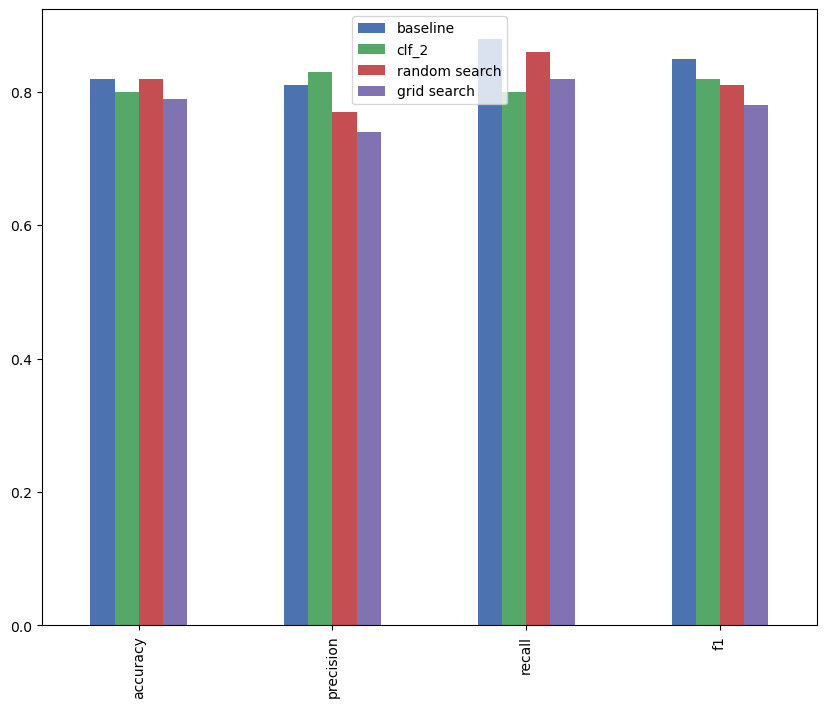

In [24]:
plt.style.use('seaborn-v0_8-deep')
compare_metrics = pd.DataFrame({"baseline": baseline_metrics,
                                "clf_2": clf_2_metrics,
                                "random search": rs_metrics,
                                "grid search": gs_metrics})

compare_metrics.plot.bar(figsize=(10, 8));

# Guardar y cargar modelos entrenados de machine learning

In [25]:
workflow

['1. Obtener y preparar los datos',
 '2. Dividir los datos',
 '3. Elegir el mejor modelo/estimador/algoritmo para nuestro problema y sus hiperparámetros**',
 '4. Ajustar el modelo/algoritmo a los datos de entrenamiento',
 '5. Hacer predicciones',
 '6. Evaluar el modelo',
 '7. Mejorar el modelo',
 '8. Guardar y cargar el modelo']

Existen dos formas principales de guardar y cargar modelos de machine learning:

* Con el módulo `pickle`de Python
* Con el módilo `joblib`

### Pickle

In [26]:
import pickle

# Guardar un modelo existente en un archivo
pickle.dump(gs_clf, open("../../models/gs_random_forest_model_1.pkl", "wb"))

In [27]:
# Cargar el modelo guardado
loaded_pickle_model = pickle.load(open("../../models/gs_random_forest_model_1.pkl", "rb"))

In [28]:
# Hacer algunas predicciones
pickle_y_preds = loaded_pickle_model.predict(X_test)
evaluate_preds(y_test, pickle_y_preds)

Acc: 78.69%
Precision: 0.74
Recall: 0.82
F1 score: 0.78


{'accuracy': 0.79, 'precision': 0.74, 'recall': 0.82, 'f1': 0.78}

### Joblib

In [29]:
from joblib import dump, load

# Guardar el modelo en un archivo
dump(gs_clf, filename="../../models/gs_random_forest_model_1.joblib")

['../../models/gs_random_forest_model_1.joblib']

In [30]:
# Importar el modelo guardado
loaded_joblib_model = load(filename="../../models/gs_random_forest_model_1.joblib")

In [31]:
# Hacer predicciones
joblib_y_preds = loaded_joblib_model.predict(X_test)
evaluate_preds(y_test, joblib_y_preds)

Acc: 78.69%
Precision: 0.74
Recall: 0.82
F1 score: 0.78


{'accuracy': 0.79, 'precision': 0.74, 'recall': 0.82, 'f1': 0.78}

#### ¿Cuándo usar Pickle y cuándo Joblib?

**Usar Pickle:**

- Cuando el modelo o los datos a guardar son relativamente pequeños y simples.
- Para guardar cualquier tipo de objeto Python que no sea específico de machine learning.
- Ejemplo: Guardar estructuras como listas, diccionarios o configuraciones de parámetros.

**Usar Joblib:**

- Cuando el modelo incluye grandes arrays de NumPy o estructuras pesadas como los entrenados por scikit-learn.
- Optimizado para velocidad y almacenamiento eficiente de objetos grandes.
- Ejemplo: Guardar modelos de machine learning como Random Forest, Gradient Boosting, etc.